In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Idea: https://community.storytellingwithdata.com/challenges/oct-2019-improve-this-table/using-the-right-display-to-tell-the-story/images

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df = df.rename(columns={'% of subscribers': 'subs', '% of revenue': 'rev'})

In [4]:
df

,Tiers,subs,rev
0,A,2,48
1,B,4,10
2,C,21,18
3,D,73,24


In [5]:
df['colors']=['#F6AC30', '#BFBFBF', '#BFBFBF', '#50C250']

In [6]:
df

,Tiers,subs,rev,colors
0,A,2,48,#F6AC30
1,B,4,10,#BFBFBF
2,C,21,18,#BFBFBF
3,D,73,24,#50C250


In [7]:
def color_title(labels, colors, textprops = {'size':'large'}, ax = None, y = 1.013,
               precision = 10**-2):
     
    "Creates a centered title with multiple colors. Don't change axes limits afterwards."
        
    if ax == None:
        ax = plt.gca()
        
    plt.gcf().canvas.draw()
    transform = ax.transAxes # use axes coords
    
    # initial params
    xT = 0 # where the text ends in x-axis coords
    shift = 0 # where the text starts
    
    # for text objects
    text = dict()

    while (np.abs(shift - (1-xT)) > precision) and (shift <= xT) :         
        x_pos = shift 
        
        for label, col in zip(labels, colors):

            try:
                text[label].remove()
            except KeyError:
                pass
            
            text[label] = ax.text(x_pos, y, label, 
                        transform = transform, 
                        ha = 'left',
                        color = col,
                                            **textprops)
            
            x_pos = text[label].get_window_extent()\
                   .transformed(transform.inverted()).x1
            
        xT = x_pos # where all text ends
        
        shift += precision/2 # increase for next iteration
      
        if x_pos > 1: # guardrail 
            break

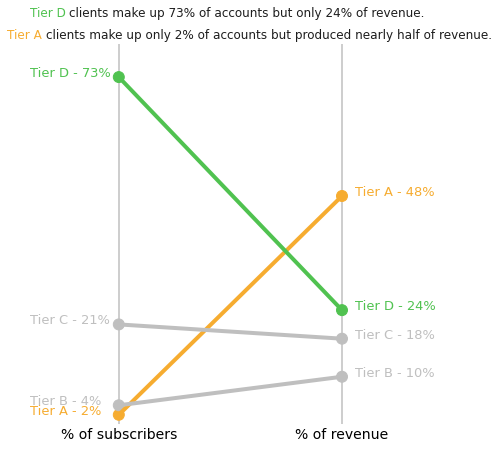

In [8]:
# Create playground
fig, ax = plt.subplots(figsize=(8, 7))

# Remove noise
ax.spines[['bottom', 'top', 'left', 'right']].set_visible(False)
ax.tick_params(axis='both', length=0)

#Add vertical line
ax.vlines(0,0,100, zorder=0,colors='#BFBFBF')
ax.vlines(1,0,100, zorder=0,colors='#BFBFBF')

# Plot the values
ax.scatter(x=[0] * len(df.subs), y = df.subs, c=df.colors, s=120, zorder=1)
ax.scatter(x=[1] * len(df.subs), y = df.rev, c=df.colors, s=120, zorder=1)

# Plot the lines between values
for a, b, c,t in zip(df.subs, df.rev, df['colors'],df.Tiers):
    point1 = [0, a]
    point2 = [1, b]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, c=c, linestyle="-", linewidth=4)
    ax.text(x=point1[0]-0.4,y=point1[1],s=(f'Tier {t} - {a}%'),color=c, size=13)
    ax.text(x=point2[0]+0.06,y=point2[1],s=(f'Tier {t} - {b}%'),color=c, size=13)
    
# Set limit 
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0,80)

# Set ticks for axes
ax.set_yticks([])
ax.set_xticks(np.arange(0,2,1))
ax.set_xticklabels(['% of subscribers', '% of revenue'])
ax.tick_params('x', labelsize=14)

# Title color
title_l1 = ['Tier D ', 'clients make up 73% of accounts but only 24% of revenue.']
colors_1 = ['#50C250','#1E1E1E']
title_l2 = ['Tier A ', 'clients make up only 2% of accounts but produced nearly half of revenue.']
colors_2 = ['#F6AC30','#1E1E1E']
color_title(title_l1, colors_1, y=1.07)
color_title(title_l2, colors_2)

#plt.savefig('revenuetiers.png', dpi=300, facecolor='white',bbox_inches='tight' )